## Plotting time-series
📘 Theory: Reading Data with a Time Index
When working with time series data in pandas, it's useful to set a datetime column as the index of a DataFrame. This allows pandas and libraries like Matplotlib to handle time-aware plots automatically, enabling:

Proper formatting of date labels on the x-axis

Time-based slicing or resampling of data

More intuitive plotting for trends over time

In [11]:
import pandas as pd 

stock_data = pd.read_csv(r"C:\Users\Dell\OneDrive\Desktop\KaranCodes\Goal-to-be-ML-Engineer-2026\Data-wrangling-and-visualization-python\Data-VIsualization\Matplotlib\dataset\stockdata.csv", parse_dates=["date"], index_col="date")

## 📘 Theory: Visualizing Stock Price Time Series
To plot time-series data like stock prices, we use the plot() method of a Matplotlib Axes object.

The x-axis should be a time-based index (e.g., daily dates).

The y-axis represents values of interest (e.g., "closing price", "volume").

This enables us to clearly see how the variable changes over time.

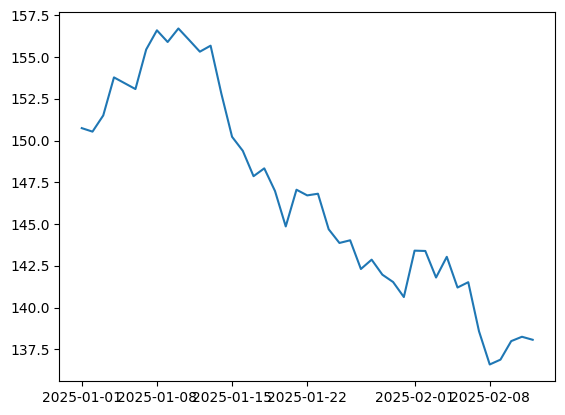

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a figure and axis
fig, ax = plt.subplots()

# Plot closing price over time
ax.plot(stock_data.index, stock_data["close_price"])

# Show the plot
plt.show()

## Zooming in on Time-Series Data Using Date Indexing
When a DataFrame has a datetime index, you can use this index not only for plotting the full time series but also to slice specific date ranges easily. This allows zooming in on a particular period of interest without altering the original dataset.

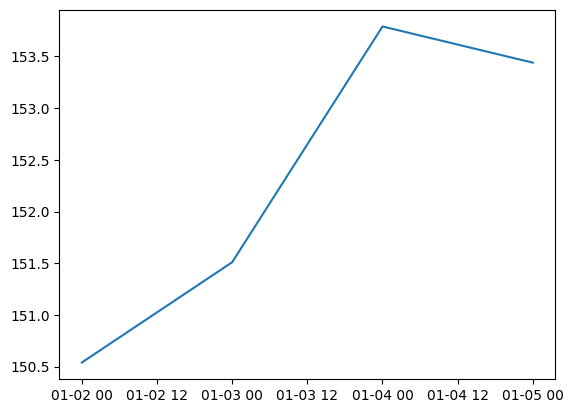

In [13]:
import matplotlib.pyplot as plt

# Slice the data for the selected date range
zoomed_stock = stock_data.loc["2025-01-02":"2025-01-05"]

# Create a figure and axis
fig, ax = plt.subplots()

# Plot the closing price for the zoomed range
ax.plot(zoomed_stock.index, zoomed_stock["close_price"])

# Show the plot
plt.show()

## Plotting Two Time-Series Variables with Different Scales
When you have two time-series variables recorded over the same time period, you can plot them on the same graph for comparison.

If the two variables have similar scales, you can plot them directly on the same axes.

If they have very different scales, it's better to use two y-axes.
To do this, Matplotlib provides the twinx() method, which creates a second y-axis sharing the same x-axis.

This approach helps to visualize both variables clearly without one overshadowing the other due to scale differences.

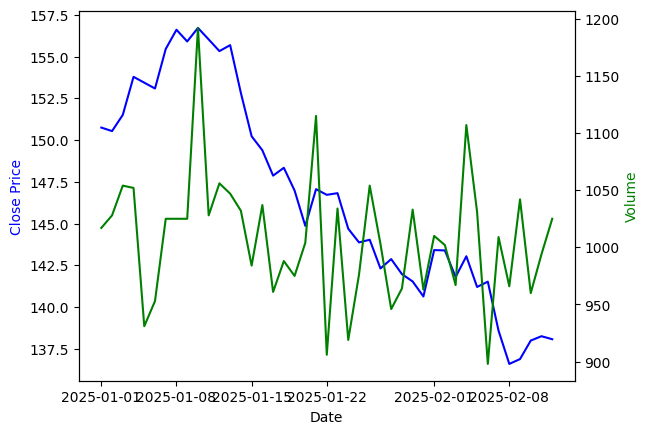

In [15]:
import matplotlib.pyplot as plt
import pandas as pd

# Initialize a Figure and Axes
fig, ax = plt.subplots()

# Plot the close_price on ax (left y-axis)
ax.plot(stock_data.index, stock_data["close_price"], color='blue')
ax.set_ylabel("Close Price", color='blue')
ax.set_xlabel("Date")

# Create a twin Axes that shares the x-axis
ax2 = ax.twinx()

# Plot the volume on ax2 (right y-axis)
ax2.plot(stock_data.index, stock_data["volume"], color='green')
ax2.set_ylabel("Volume", color='green')

# Show the plot
plt.show()


## Theory: Creating a Reusable Plotting Function for Time-Series Data
When plotting time-series data multiple times in your program, repeating the same plotting code can lead to redundancy. Instead, you can wrap your plotting logic into a function that:

Accepts input variables (x, y) and a color

Plots the data

Sets axis labels

Colors axis labels, ticks, and tick labels appropriately

This helps maintain cleaner code and allows for reusability and consistency across visualizations.

In [16]:
# Define a function called plot_timeseries
def plot_timeseries(axes, x, y, color, xlabel, ylabel):

  # Plot the inputs x,y in the provided color
  axes.plot(x, y, color=color)

  # Set the x-axis label
  axes.set_xlabel(xlabel)

  # Set the y-axis label
  axes.set_ylabel(ylabel, color=color)

  # Set the colors tick params for y-axis
  axes.tick_params('y', colors=color)

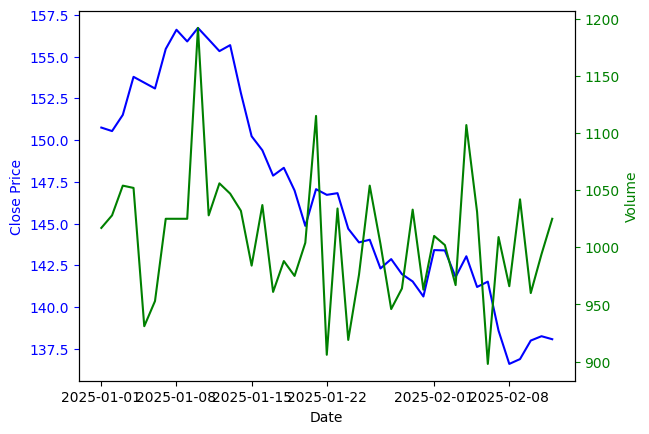

In [17]:
fig, ax = plt.subplots()

# Plot close_price on the primary y-axis (left)
plot_timeseries(ax, stock_data.index, stock_data['close_price'], "blue", "Date", "Close Price")

# Create a twin y-axis for volume (right)
ax2 = ax.twinx()

# Plot volume on the secondary y-axis
plot_timeseries(ax2, stock_data.index, stock_data['volume'], "green", "Date", "Volume")

# Show the final plot
plt.show()